Project Tasks
1. Data Loading And Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning And Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis With NumPy And SciPy:
Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization With Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis And Conclusion:
Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.


Resources
Download the train dataset (exclude the test set):
Mobile Price Classification Dataset


Project Submission
Submit the following in a GitHub repository:

Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
Clean, well-commented Python code.
Distinct headings for each analysis phase.
In-depth comments elucidating findings and the importance of each analytical step.


Pro Tips
Individually examine each feature to grasp its unique traits and influence.
Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
Reference course materials for guidance on complex statistical functions and their practical uses.

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [3]:
path = r'C:\Users\97258\Documents\DI-Bootcamp\week_6\day_5\train.csv'

data = pd.read_csv(path)
train_df = pd.DataFrame(data)
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
correlation_matrix = train_df.corrwith(train_df['price_range'])
correlation_matrix


battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
dtype: float64

The only phone feature that really stands out as correlated with price range is RAM. It has a correlation to price range of 0.92 whereas no other feature exceeds 0.20 (battery power). I will map RAM with box plots/violin plots as well as battery power just to see battery power visually in case I notice something that the correlation number itself doesn't show.

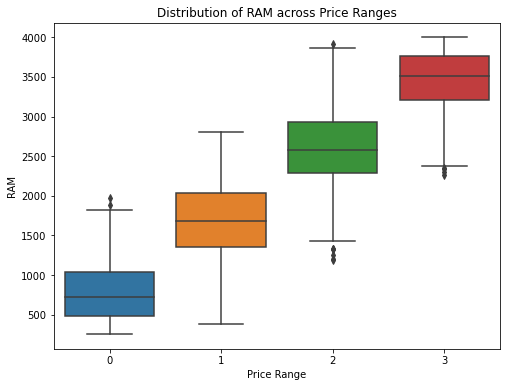

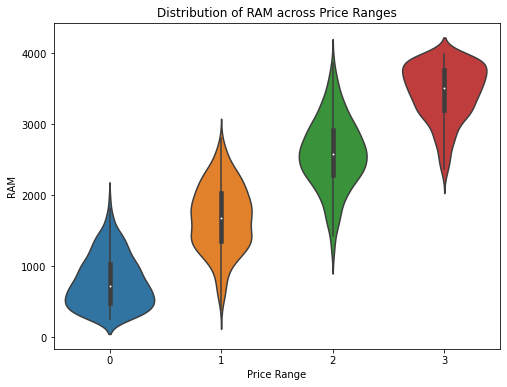

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('Distribution of RAM across Price Ranges')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='price_range', y='ram', data=train_df)
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('Distribution of RAM across Price Ranges')
plt.show()

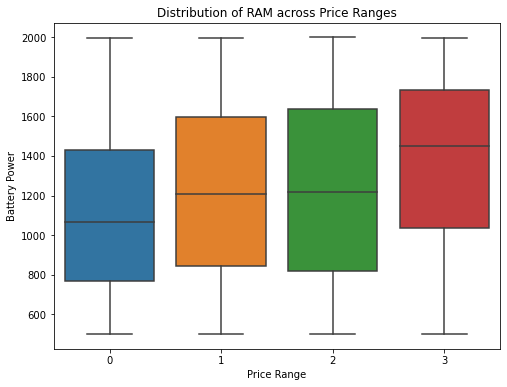

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='battery_power', data=train_df)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Distribution of RAM across Price Ranges')
plt.show()

As expected, the batter power bar plots and violin plots don't give me much information. Though we do notice that the 25th to 75th percentile of the first and last price range are differentiated, there's such a large range, it's hard to predict price range on basis of battery power

In [10]:
import statsmodels.api as sm

y = train_df['price_range']
x = train_df[['ram']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:06:04   Log-Likelihood:                -1222.3
No. Observations:                2000   AIC:                             2449.
Df Residuals:                    1998   BIC:                             2460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5083      0.022    -23.172      0.000      -0.551      -0.465
ram            0.0009    9.2e-06    102.791      0.000       0.001       0.001
==============================================================================
Omnibus:                        9.184   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.386
Skew:                           0.139   Prob(JB):                      0.00916
Kurtosis:                       3.189   Cond. No.                     5.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y = train_df['price_range']
x = train_df[['battery_power','ram']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     7428.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:06:08   Log-Likelihood:                -928.15
No. Observations:                2000   AIC:                             1862.
Df Residuals:                    1997   BIC:                             1879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1432      0.031    -37.112      0.000      -1.204      -1.083
battery_power     0.0005   1.96e-05     26.135      0.000       0.000       0.001
ram               0.0009   7.94e-06    119.066      0.000       0.001       0.001
==============================================================================
Omnibus:                       22.983   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.536
Skew:                           0.235   Prob(JB):                     1.28e-05
Kurtosis:                       2.777   Cond. No.                     9.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
import statsmodels.api as sm

y = train_df['price_range']
x = train_df[['px_width','px_height', 'ram']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     4742.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:06:13   Log-Likelihood:                -965.79
No. Observations:                2000   AIC:                             1940.
Df Residuals:                    1996   BIC:                             1962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0340      0.032    -32.447      0.000      -1.097      -0.972
px_width       0.0003   2.36e-05     11.328      0.000       0.000       0.000
px_height      0.0003    2.3e-05     12.559      0.000       0.000       0.000
ram            0.0009    8.1e-06    117.003      0.000       0.001       0.001
==============================================================================
Omnibus:                       20.209   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.739
Skew:                           0.060   Prob(JB):                      0.00104
Kurtosis:                       2.612   Cond. No.                     9.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y = train_df['price_range']
x = train_df[['ram','px_width', 'px_height', 'battery_power']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     5523.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:06:16   Log-Likelihood:                -570.01
No. Observations:                2000   AIC:                             1150.
Df Residuals:                    1995   BIC:                             1178.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6719      0.033    -50.317      0.000      -1.737      -1.607
ram               0.0009   6.65e-06    142.572      0.000       0.001       0.001
px_width          0.0003   1.94e-05     14.380      0.000       0.000       0.000
px_height         0.0003   1.89e-05     14.605      0.000       0.000       0.000
battery_power     0.0005   1.64e-05     31.123      0.000       0.000       0.001
==============================================================================
Omnibus:                      111.127   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.456
Skew:                           0.058   Prob(JB):                     3.66e-10
Kurtosis:                       2.287   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I attempted to conduct a multiple regression analysis to see if the combination of RAM and other features are a better predictor of price-range than RAM alone. I find that the combination of RAM, pixel width, pixel height, and battery power has an R-squared of 0.917 while RAM alone has an R-squared of 0.841. This indicates to me that the most effective features to include might be to maximize RAM while including high screen pixels 

In [14]:
bool_columns =  ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

for col in bool_columns:
    grouped_counts = train_df[train_df[col] == True].groupby('price_range')[col].count()
    print(grouped_counts)




price_range
0    243
1    245
2    243
3    259
Name: blue, dtype: int64
price_range
0    250
1    255
2    249
3    265
Name: dual_sim, dtype: int64
price_range
0    259
1    262
2    247
3    275
Name: four_g, dtype: int64
price_range
0    373
1    378
2    387
3    385
Name: three_g, dtype: int64
price_range
0    262
1    261
2    235
3    248
Name: touch_screen, dtype: int64
price_range
0    248
1    252
2    252
3    262
Name: wifi, dtype: int64


I wanted to take all the boolean values to see if it's the case that due to its binary nature (1 for yes, 0 for no), something is being lost with the prior correlation analysis and perhaps there really is a correlation you can notice when viewed this way. As it turns out, there really is only a weak correlation. You can see that for almost all the features the higher the price range, the larger the count. However, it is only a bit higher and there's huge overlap between all price ranges. It therefore may be a good idea to include features like 4G and blue tooth but not crucial in order to be able to pay a high price. 